In [178]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def matrixFromFile(fileName):
    with open(fileName,'r') as file:
        content = file.readlines()
    
    params = content[0].split()
    rows = int(params[0])
    cols = int(params[1])
    n = int(params[2])

    A = np.zeros((rows,cols))

    content.pop(0)
    for elemento in content:
        params = elemento.split()
        i = int(params[0])
        j = int(params[1])
        val = float(params[2])

        A[i,j] = val

    return A

def vectorFromFile(fileName):
    with open(fileName,'r') as file:
        content = file.readlines()
    n = int(content[0])
    f = []
    for i in range(n):
        f.append(float(content[i+1]))
    return np.array(f)


def formatSol(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

In [180]:
finestGridN = 50
levels = 2
N = finestGridN
for i in range(1,levels+1):
    N = N * 2 - 1
print(N)

197


In [181]:
N = 7

In [182]:
alpha = 1.
!./prova {N} {alpha}
#N = finestGridN

Norm of residual at iteration 0 = 39771.1
Norm of residual at iteration 1 = 7680.07
Norm of residual at iteration 2 = 2775.09
Norm of residual at iteration 3 = 1320.72
Norm of residual at iteration 4 = 725.644
Norm of residual at iteration 5 = 427.242
Norm of residual at iteration 6 = 258.561
Norm of residual at iteration 7 = 156.887
Norm of residual at iteration 8 = 94.159
Norm of residual at iteration 9 = 55.6129
Norm of residual at iteration 10 = 32.3574
Norm of residual at iteration 11 = 18.6118
Norm of residual at iteration 12 = 10.6206
Norm of residual at iteration 13 = 6.02872
Norm of residual at iteration 14 = 3.41064
Norm of residual at iteration 15 = 1.92538
Norm of residual at iteration 16 = 1.08546
Norm of residual at iteration 17 = 0.611424
Norm of residual at iteration 18 = 0.344225
Norm of residual at iteration 19 = 0.193732
[ 0 0 0 0 0 0 0 0 0.104217 0.130418 0.117474 0.0783568 0.029392 0 0 0.130433 0.15664 0.137135 0.088186 0.0294005 0 0 0.117498 0.137147 0.117593 0.07

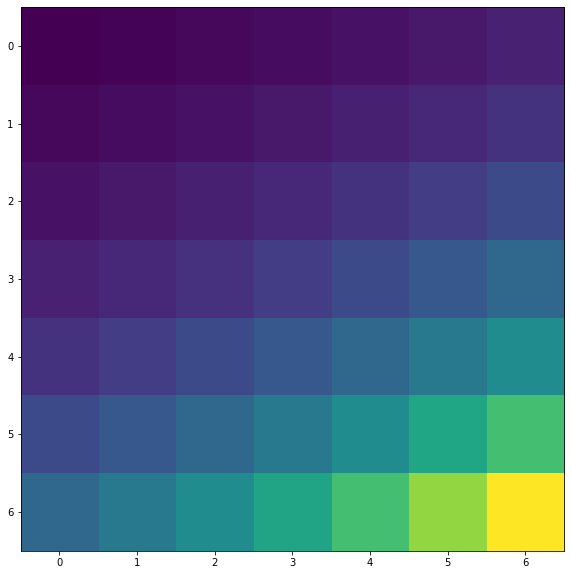

In [183]:
plt.rcParams['figure.figsize'] = [10,10]
colorMap = 'viridis'
u = vectorFromFile('x.mtx')
sol = formatSol(N,u)
plt.imshow(sol,cmap=colorMap)
plt.show()

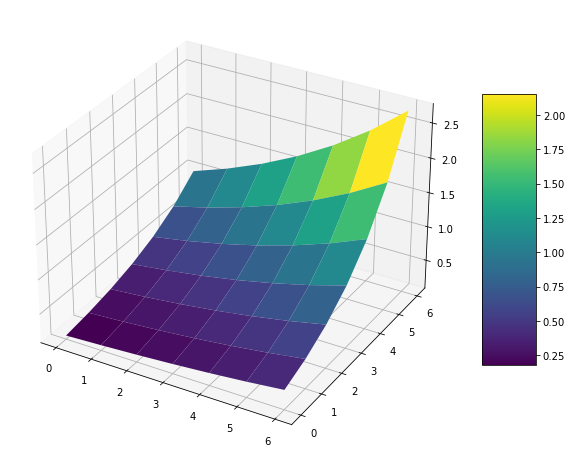

In [184]:
X = np.arange(0,N)
Y = np.arange(0,N)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [185]:
'''
matrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']

for matrice in matrici:
    mat = matrixFromFile(matrice)
    plt.imshow(mat)
    plt.show()
'''

"\nmatrici = ['A_h.mtx','A_2h.mtx','A_4h.mtx']\n\nfor matrice in matrici:\n    mat = matrixFromFile(matrice)\n    plt.imshow(mat)\n    plt.show()\n"

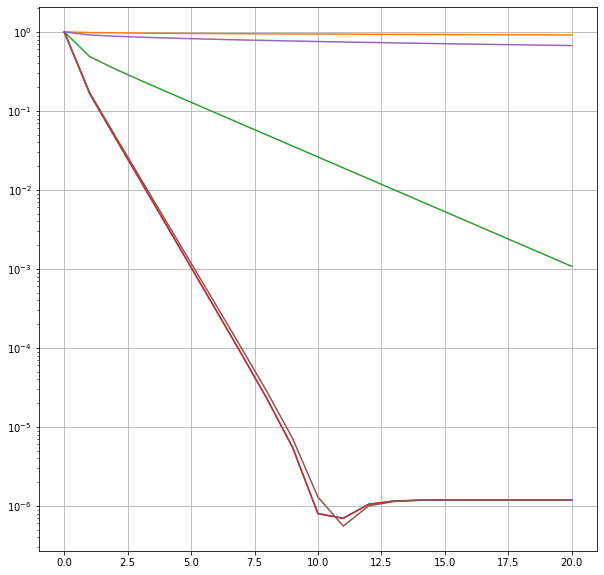

In [186]:
solvers = ['histMG.txt','histGS.txt','hist2MG.txt','hist3MG.txt','hist20GS.txt','prova.txt']
#solvers = ['histGS.txt','hist2MG.txt','hist20GS.txt','provaMG.txt']
for solver in solvers:
    error = vectorFromFile(solver)
    x = np.arange(0,len(error))
    plt.semilogy(x,error)
plt.grid()
plt.show()